# Тема “Обучение с учителем”

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')

## Задание 1
1. Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = boston["data"]
data.shape

(506, 13)

In [5]:
feature_names = boston["feature_names"]
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston["DESCR"])
target = boston["target"]
target[:10]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

 2. Создайте датафреймы X и y из этих данных.

In [7]:
X = pd.DataFrame(data, columns=feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
y = pd.DataFrame(target, columns=["price"])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


3. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

4. Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

5. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [13]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
print('коэффициент детерминации 𝑅2= {:.3f},\
      средняя квадратическая ошибка= {:.3f},\
      средняя абсолютная ошибка= {:.3f}'.format(r2_score(y_test, y_pred),
                                                mean_squared_error(
                                                    y_test, y_pred),
                                                mean_absolute_error(y_test, y_pred)))

коэффициент детерминации 𝑅2= 0.711,      средняя квадратическая ошибка= 21.517,      средняя абсолютная ошибка= 3.163


## Задание 2
1. Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

2. Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [18]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

3. Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [19]:
y_pred = model.predict(X_test)
print('коэффициент детерминации 𝑅2= {:.3f},\
      средняя квадратическая ошибка= {:.3f},\
      средняя абсолютная ошибка= {:.3f}'.format(r2_score(y_test, y_pred),
                                                mean_squared_error(
                                                    y_test, y_pred),
                                                mean_absolute_error(y_test, y_pred)))

коэффициент детерминации 𝑅2= 0.875,      средняя квадратическая ошибка= 9.335,      средняя абсолютная ошибка= 2.083


***Модель RandomForestRegressor в данном случае работает лучше***

In [20]:
# for i in np.arange(10, 17):
#     for k in np.arange(700, 2000, 100):
#         model2 = RandomForestRegressor(n_estimators=k, max_depth=i, random_state=42)
#         model2.fit(X_train, y_train.values[:,0])
#         y_pred = model2.predict(X_test)
#         r_2 = r2_score(y_test, y_pred)
#         if r_2 > 0.8764:
#             print(i, k, r_2)
# test optimal = 15 790 0.8764546841333816

## *Задание 3
1. Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [21]:
# ?RandomForestRegressor

In [22]:
np.sum(model.feature_importances_)

1.0

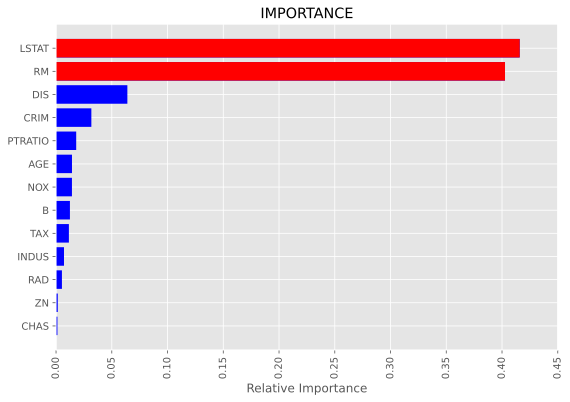

In [23]:
importances = model.feature_importances_
num = len(importances)
plt.figure(figsize=(9, 6))
plt.title('IMPORTANCE')
plt.barh(range(num), importances[np.argsort(importances)], color='b')
plt.barh(range(num-2, num),
         importances[np.argsort(importances)][num-2:num], color='r')
plt.yticks(range(len(importances)), feature_names[np.argsort(importances)])
plt.xticks(np.arange(0, 0.5, 0.05), rotation=90)
plt.xlabel('Relative Importance')
plt.show()

In [24]:
feat_imp = pd.DataFrame({'name': feature_names,
                         'feature_importance': importances},
                        columns=['feature_importance', 'name']).sort_values(by='feature_importance')

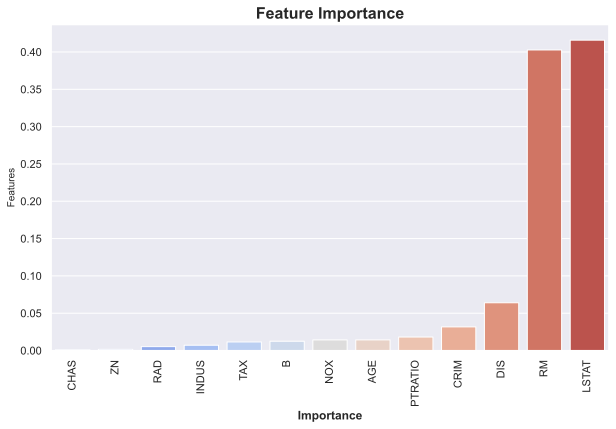

In [25]:
sns.set(style="darkgrid", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
sns.barplot(y='feature_importance', x='name',
            data=feat_imp, orient='v', palette='coolwarm')
plt.xlabel('Importance', fontsize=12, weight='bold')
plt.ylabel('Features', fontsize=10)
plt.xticks(rotation=90)
plt.title('Feature Importance', fontsize=16, weight='bold')
plt.show()

## *Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.

In [27]:
df = pd.read_csv('creditcard.csv')

In [28]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [31]:
def reduce_mem_usage(df):   # test
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(
        100 * (start_mem - end_mem) / start_mem))

    return df

In [32]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 32.87 MB
Decreased by 51.2%


Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.

In [33]:
y = df['Class']
X = df.drop(columns='Class')

Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=100, stratify=y)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(199364, 30)
(85443, 30)
(199364,)
(85443,)


Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [36]:
parameters = [{'n_estimators': [10, 15],
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:

In [37]:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
    return_train_score=True)

Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [38]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             return_train_score=True, scoring='roc_auc')

Просмотрите параметры лучшей модели с помощью атрибута best_params_.

In [39]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [40]:
clf2 = RandomForestClassifier(
    max_depth=6, max_features=3, n_estimators=15, random_state=100)
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15,
                       random_state=100)

Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.

In [41]:
y_pred_proba2 = clf2.predict_proba(X_test)[:, 1]
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.

In [42]:
from sklearn.metrics import roc_auc_score

In [43]:
roc_auc_score(y_test, y_pred_proba), roc_auc_score(y_test, y_pred_proba2)

(0.9462664156037156, 0.9462664156037156)